# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
response_btc_data = requests.get(btc_url).json()

# Fetch current ETH price
response_eth_data = requests.get(eth_url).json()

# Compute current value of my crpto
my_btc_value = response_btc_data['data']['1']['quotes']['CAD']['price']
my_eth_value = response_eth_data['data']['1027']['quotes']['CAD']['price']

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $39421.55
The current value of your 5.3 ETH is $1441.12


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [10]:
# Format current date as ISO format
today = pd.Timestamp("2021-01-21", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df


# Preview DataFrame
df_portfolio

AGG                                        SPY  \
                             open      high     low   close   volume    open   
time                                                                           
2021-01-21 00:00:00-05:00  117.22  117.2985  117.14  117.26  5801029  384.49   

                                                            
                             high     low  close    volume  
time                                                        
2021-01-21 00:00:00-05:00  384.95  383.25  384.2  41800991

In [11]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.26
Current SPY closing price: $384.2


In [23]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19210.00
The current value of your 200 AGG shares is $23452.00


### Savings Health Analysis

In [82]:
# Set monthly household income
monthly_income=12000

# Create savings DataFrame
crypto_value = my_btc_value + my_eth_value
stocks_value = my_agg_value + my_spy_value

portfolio = [{"crypto": crypto_value,
              "shares": stocks_value }]
df= pd.DataFrame(portfolio)
df_savings = df.transpose()

df_savings.rename(columns= {0: 'Amount'},inplace=True)
# Display savings DataFrame
display(df_savings)

,Amount
crypto,40862.67339
shares,42662.00000


<AxesSubplot:title={'center':'compisition of personal savings'}, ylabel='Amount'>

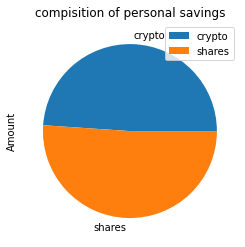

In [83]:
# Plot savings pie chart
df_savings.plot.pie(y=0, title = "compisition of personal savings")

In [30]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings[0].sum()

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund")
elif total_savings < emergency_fund:
    print(f"You are $ {emergency_fund - total_savings} away from reaching your goal")
else:
    print("Congratulations! You have reached your financial goal")

Congratulations! You have enough money in your emergency fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [32]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-01-21', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-01-21', tz='America/New_York').isoformat()

In [33]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
df_stock_data.head()

AGG                                         SPY  \
                             open     high       low   close   volume    open   
time                                                                            
2016-01-21 00:00:00-05:00  109.08  109.080  108.7400  108.78  6927926  186.21   
2016-01-22 00:00:00-05:00  108.72  108.850  108.5850  108.82  2980878  189.78   
2016-01-25 00:00:00-05:00  108.95  108.980  108.7700  108.79  3120189  189.93   
2016-01-26 00:00:00-05:00  108.90  108.995  108.7699  108.90  2023631  188.42   
2016-01-27 00:00:00-05:00  108.91  109.010  108.7200  108.95  1531148  189.58   

                                                              
                             high     low   close     volume  
time                                                          
2016-01-21 00:00:00-05:00  188.87  184.64  186.68  154918462  
2016-01-22 00:00:00-05:00  190.76  188.88  190.49  132418951  
2016-01-25 00:00:00-05:00  190.15  187.41  187.66   99219694  
2016-01-26 00:00:00-05:00  190.53  188.02  190.18  115312517  
2016-01-27 00:00:00-05:00  191.56  187.06  188.12  157060622

In [34]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [35]:
# Printing the simulation input data
MC_dist.portfolio_data.head()

AGG                                      \
                             open     high       low   close   volume   
time                                                                    
2016-01-21 00:00:00-05:00  109.08  109.080  108.7400  108.78  6927926   
2016-01-22 00:00:00-05:00  108.72  108.850  108.5850  108.82  2980878   
2016-01-25 00:00:00-05:00  108.95  108.980  108.7700  108.79  3120189   
2016-01-26 00:00:00-05:00  108.90  108.995  108.7699  108.90  2023631   
2016-01-27 00:00:00-05:00  108.91  109.010  108.7200  108.95  1531148   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2016-01-21 00:00:00-05:00          NaN  186.21  188.87  184.64  186.68   
2016-01-22 00:00:00-05:00     0.000368  189.78  190.76  188.88  190.49   
2016-01-25 00:00:00-05:00    -0.000276  189.93  190.15  187.41  187.66   
2016-01-26 00:00:00-05:00     0.001011  188.42  190.53  188.02  190.18   
2016-01-27 00:00:00-05:00     0.000459  189.58  191.56  187.06  188.12   

                                                   
                              volume daily_return  
time                                               
2016-01-21 00:00:00-05:00  154918462          NaN  
2016-01-22 00:00:00-05:00  132418951     0.020409  
2016-01-25 00:00:00-05:00   99219694    -0.014856  
2016-01-26 00:00:00-05:00  115312517     0.013429  
2016-01-27 00:00:00-05:00  157060622    -0.010832

In [36]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.007523,1.011113,0.992059,0.995559,0.999271,0.997977,1.013490,0.995946,0.991440,1.004790,...,1.000368,1.010629,0.998373,1.006202,0.998608,1.003494,0.987600,0.996211,1.001950,1.000843
2,1.006927,1.008901,0.995730,0.989688,1.004282,1.000129,0.995391,0.997197,0.990628,1.001327,...,1.001975,1.021560,1.005345,1.005872,1.000886,1.003485,0.984999,1.009750,1.013160,1.006993
3,1.020943,1.011178,1.001369,0.988608,1.009341,1.004323,0.992269,0.990590,0.990176,0.995917,...,1.005307,1.035911,1.011341,1.000905,0.997824,0.998899,0.991699,1.014740,1.016954,1.001553
4,1.019828,1.006338,1.011818,0.997724,1.003203,1.001160,1.006205,0.992012,1.001042,1.003109,...,1.010169,1.034173,1.005246,1.001425,0.995973,1.006387,0.986172,1.015447,1.023963,1.004574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,19.805328,12.487944,7.126611,13.011298,15.208641,12.823748,15.362075,16.053818,16.018572,5.684774,...,15.669122,20.538644,9.470411,12.611310,12.114826,19.273767,25.697040,13.046733,7.018038,26.701052
7557,19.842849,12.222673,7.093265,13.145602,15.210112,12.901691,15.444217,15.979107,16.012322,5.646669,...,15.729220,20.317172,9.369556,12.517568,12.068159,19.288706,25.564050,13.033910,7.084906,26.680662
7558,19.809799,12.316239,7.183105,13.110058,15.098337,12.926289,15.388317,16.033572,15.994713,5.699052,...,15.558485,20.208790,9.410117,12.513021,11.935513,19.245739,25.488040,12.914996,6.926242,26.723333
7559,19.742946,12.248480,7.313412,13.004388,15.335745,12.958959,15.461336,16.111555,16.208476,5.691822,...,15.563645,20.226154,9.306422,12.534759,11.917815,19.120686,25.712612,12.978405,6.932174,26.893427


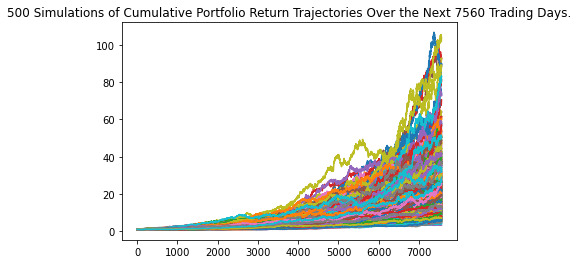

In [38]:
# Plot simulation outcomes
line_plot = MC_dist.plot_simulation()

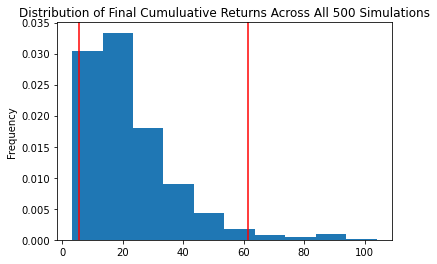

In [39]:
# Plot probability distribution and confidence intervals
dist_plot = MC_dist.plot_distribution()

### Retirement Analysis

In [40]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_dist.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             22.545831
std              15.333119
min               3.249897
25%              12.346216
50%              18.203158
75%              27.392701
max             103.972381
95% CI Lower      5.651542
95% CI Upper     61.405065
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [41]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $113030.84 and $1228101.31


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [43]:
# Set initial investment
initial_investment_new = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment_new,2)
ci_upper = round(tbl[9]*initial_investment_new,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $169546.26 and $1842151.96


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [62]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_dist_2 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.7,.3],
    num_simulation = 500,
    num_trading_days = 252*5
)
MC_dist_2.portfolio_data.head()


AGG                                      \
                             open     high       low   close   volume   
time                                                                    
2016-01-21 00:00:00-05:00  109.08  109.080  108.7400  108.78  6927926   
2016-01-22 00:00:00-05:00  108.72  108.850  108.5850  108.82  2980878   
2016-01-25 00:00:00-05:00  108.95  108.980  108.7700  108.79  3120189   
2016-01-26 00:00:00-05:00  108.90  108.995  108.7699  108.90  2023631   
2016-01-27 00:00:00-05:00  108.91  109.010  108.7200  108.95  1531148   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2016-01-21 00:00:00-05:00          NaN  186.21  188.87  184.64  186.68   
2016-01-22 00:00:00-05:00     0.000368  189.78  190.76  188.88  190.49   
2016-01-25 00:00:00-05:00    -0.000276  189.93  190.15  187.41  187.66   
2016-01-26 00:00:00-05:00     0.001011  188.42  190.53  188.02  190.18   
2016-01-27 00:00:00-05:00     0.000459  189.58  191.56  187.06  188.12   

                                                   
                              volume daily_return  
time                                               
2016-01-21 00:00:00-05:00  154918462          NaN  
2016-01-22 00:00:00-05:00  132418951     0.020409  
2016-01-25 00:00:00-05:00   99219694    -0.014856  
2016-01-26 00:00:00-05:00  115312517     0.013429  
2016-01-27 00:00:00-05:00  157060622    -0.010832

In [63]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_dist_2.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996253,0.997736,0.992523,0.996027,1.002378,1.001995,1.000216,0.993997,1.001400,1.001133,...,1.000619,0.999646,1.004800,0.997080,0.997480,0.999261,0.996060,1.004181,1.009709,1.002088
2,0.995206,1.002621,0.988859,0.999161,1.005587,1.001937,1.003529,1.003316,1.006538,0.992809,...,0.996585,0.994332,1.003057,0.990109,0.997502,0.996999,0.990750,1.002809,1.003313,0.998332
3,0.990518,0.998917,0.981975,0.998941,1.001682,1.000329,0.996189,1.004195,1.014262,0.999500,...,0.994113,0.999874,1.002276,0.988833,0.995235,0.997824,0.989827,1.001589,1.009404,0.997875
4,0.988103,0.996462,0.981787,1.003086,1.002115,0.995351,0.999750,1.001829,1.011091,1.003981,...,0.991975,1.006653,1.002981,0.986343,0.999372,0.999266,0.989654,1.000085,1.008102,0.997405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.308445,1.164071,1.145401,1.489150,1.133723,1.247365,1.108178,1.160337,1.489182,1.339262,...,1.457813,1.408148,1.143852,1.467699,1.248226,1.350288,1.157886,1.582583,1.689387,1.231218
1257,1.310380,1.169320,1.147406,1.485435,1.138661,1.244333,1.109475,1.154412,1.488029,1.341443,...,1.457160,1.408288,1.143659,1.462402,1.246814,1.333868,1.156762,1.579865,1.686135,1.235404
1258,1.311352,1.171204,1.144097,1.489217,1.132057,1.249712,1.103197,1.152433,1.485148,1.350090,...,1.471223,1.409119,1.137259,1.457809,1.245045,1.340053,1.155562,1.593701,1.692999,1.227775
1259,1.314311,1.180357,1.142626,1.489262,1.122852,1.244868,1.104424,1.160720,1.481894,1.365658,...,1.480581,1.414467,1.127078,1.456785,1.244213,1.337455,1.160337,1.598210,1.685221,1.217965


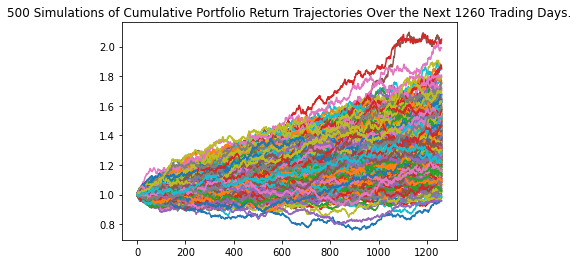

In [64]:
# Plot simulation outcomes
line_plot = MC_dist_2.plot_simulation()

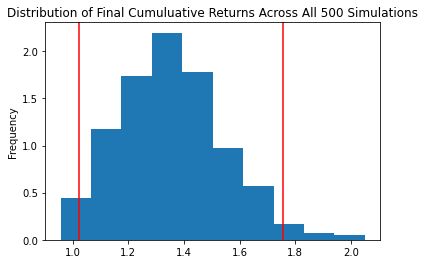

In [65]:
# Plot probability distribution and confidence intervals
dist_plot = MC_dist_2.plot_distribution()

In [66]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_five_yrs = MC_dist_2.summarize_cumulative_return()

# Print summary statistics
print(tbl_five_yrs)

count           500.000000
mean              1.354920
std               0.187821
min               0.956904
25%               1.227029
50%               1.353517
75%               1.469246
max               2.049749
95% CI Lower      1.021590
95% CI Upper      1.754162
Name: 1260, dtype: float64


In [75]:
# Set initial investment
initial_investment_five = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl_five_yrs[8]*initial_investment_five,2)
ci_upper_five = round(tbl_five_yrs[9]*initial_investment_five,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_five} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $61295.39 and $105249.75


### Ten Years Retirement Option

In [70]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_dist_ten = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252*10
)
MC_dist_ten.portfolio_data.head()

AGG                                      \
                             open     high       low   close   volume   
time                                                                    
2016-01-21 00:00:00-05:00  109.08  109.080  108.7400  108.78  6927926   
2016-01-22 00:00:00-05:00  108.72  108.850  108.5850  108.82  2980878   
2016-01-25 00:00:00-05:00  108.95  108.980  108.7700  108.79  3120189   
2016-01-26 00:00:00-05:00  108.90  108.995  108.7699  108.90  2023631   
2016-01-27 00:00:00-05:00  108.91  109.010  108.7200  108.95  1531148   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2016-01-21 00:00:00-05:00          NaN  186.21  188.87  184.64  186.68   
2016-01-22 00:00:00-05:00     0.000368  189.78  190.76  188.88  190.49   
2016-01-25 00:00:00-05:00    -0.000276  189.93  190.15  187.41  187.66   
2016-01-26 00:00:00-05:00     0.001011  188.42  190.53  188.02  190.18   
2016-01-27 00:00:00-05:00     0.000459  189.58  191.56  187.06  188.12   

                                                   
                              volume daily_return  
time                                               
2016-01-21 00:00:00-05:00  154918462          NaN  
2016-01-22 00:00:00-05:00  132418951     0.020409  
2016-01-25 00:00:00-05:00   99219694    -0.014856  
2016-01-26 00:00:00-05:00  115312517     0.013429  
2016-01-27 00:00:00-05:00  157060622    -0.010832

In [71]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_dist_ten.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.990181,1.003984,0.998780,0.997564,1.005576,1.000645,1.014167,1.009108,1.002603,1.002281,...,1.007814,0.997337,1.024507,0.988510,0.991173,1.004020,1.010706,0.989282,1.005995,0.996943
2,0.996939,1.001075,1.004647,1.000453,0.995086,1.012400,1.018807,1.004259,1.009689,1.003727,...,1.000570,0.999714,1.007940,0.995557,0.988992,1.005192,1.007369,0.985023,1.003926,0.997628
3,0.994424,0.994276,0.997449,0.994689,0.983432,1.015616,1.022422,1.003717,1.016818,0.988829,...,0.985326,0.999004,1.009512,0.993581,0.992783,1.010622,1.015057,0.981611,1.016786,1.000955
4,0.988901,1.011499,0.985533,0.997497,0.999419,1.014828,1.020520,0.993958,1.028244,0.984731,...,0.980393,0.989420,1.015724,1.004342,0.984661,0.998346,1.018216,0.972454,1.009825,1.014306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.286171,1.714485,1.489483,2.153254,3.855692,2.594374,3.527561,3.406317,3.773645,1.970202,...,3.355673,2.999852,3.115126,3.004836,1.244397,0.994651,4.214881,2.140746,3.203716,1.919395
2517,3.254586,1.720772,1.475290,2.182933,3.796233,2.601225,3.539001,3.425184,3.786246,1.994455,...,3.372777,2.985019,3.078011,3.037646,1.242087,0.987387,4.185933,2.144403,3.166541,1.914823
2518,3.238276,1.733900,1.475878,2.184720,3.779412,2.581405,3.492907,3.417038,3.793347,2.022080,...,3.384729,2.985174,3.081677,3.025450,1.245556,0.992318,4.142574,2.150741,3.218851,1.929727
2519,3.216996,1.746109,1.491123,2.208725,3.794819,2.560714,3.496380,3.442074,3.818012,2.019674,...,3.419469,2.982972,3.123526,3.024327,1.224971,0.988142,4.145654,2.147353,3.219846,1.942340


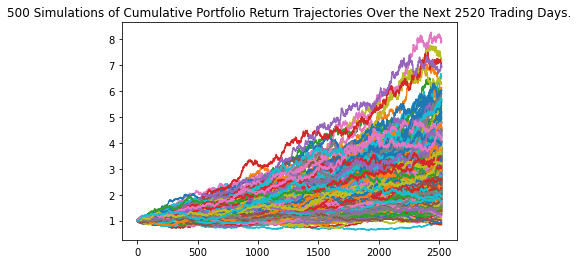

In [72]:
# Plot simulation outcomes
line_plot = MC_dist_ten.plot_simulation()

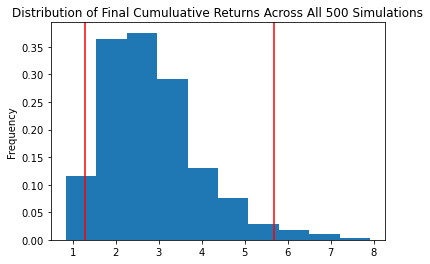

In [73]:
# Plot probability distribution and confidence intervals
dist_plot = MC_dist_ten.plot_distribution()

In [74]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_ten = MC_dist_ten.summarize_cumulative_return()

# Print summary statistics
print(tbl_ten)

count           500.000000
mean              2.853482
std               1.111024
min               0.838008
25%               2.087325
50%               2.627941
75%               3.413490
max               7.918130
95% CI Lower      1.273997
95% CI Upper      5.682482
Name: 2520, dtype: float64


In [76]:
# Set initial investment
initial_investment_ten = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl_ten[8]*initial_investment_ten,2)
ci_upper_ten = round(tbl_ten[9]*initial_investment_ten,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 10 years will end within in the range of $76439.84 and $340948.92
